# Marketing Campaign Dataset Cleaning

## Overview
This notebook demonstrates the process of cleaning the `marketing_campaign.csv` dataset. The dataset contains customer information related to a marketing campaign, including demographics, purchase behavior, and campaign responses. The goal is to clean the dataset by handling missing values, removing outliers, and ensuring consistency in categorical and numerical columns.


In [4]:
from google.colab import files
uploaded = files.upload()


Saving marketing_campaign.csv to marketing_campaign (1).csv


In [22]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# Loading the dataset
df = pd.read_csv('marketing_campaign.csv', sep='\t')


print("First 5 rows of the dataset:")
display(df.head())


print("\nDataset Information:")
print(df.info())


print("\nSummary Statistics:")
display(df.describe())

First 5 rows of the dataset:


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchase

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [17]:
print("Shape of the dataset in Rows, Cols")
df.shape

Shape of the dataset in Rows, Cols


(2240, 29)

In [19]:
print("Finding out null value count")
df.isnull().sum()

Finding out null value count


,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [21]:
print("Duplicate values count")
df.duplicated().sum()

Duplicate values count


np.int64(0)

In [24]:
# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values:\n", missing_values)





Missing Values:
 ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


In [26]:
# Fill missing values in 'Income' with the median
df['Income'] = df['Income'].fillna(df['Income'].median())



In [27]:
# Drop rows with missing values in critical categorical columns
df.dropna(subset=['Education', 'Marital_Status'], inplace=True)

In [28]:
# Listing the numerical columns
numerical_columns = [
    'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
    'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
    'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
    'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
    'NumWebVisitsMonth'
]

# Ensuring non-negative values
for col in numerical_columns:
    df = df[df[col] >= 0]

# Removing outliers using Interquartile range
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [29]:
# Defining valid categories
valid_education = ['Graduation', 'PhD', 'Master', '2n Cycle', 'Basic']
valid_marital_status = ['Single', 'Married', 'Together', 'Divorced', 'Widow']

# Filtering invalid categories
df = df[df['Education'].isin(valid_education)]
df = df[df['Marital_Status'].isin(valid_marital_status)]

#Optional data values handling
df = df[~df['Marital_Status'].isin(['Absurd', 'YOLO'])]

In [30]:
# Converting 'Dt_Customer' to datetime format
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y', errors='coerce')

# Drop rows with invalid dates
df = df[df['Dt_Customer'].notnull()]

In [31]:
df.drop_duplicates(inplace = True)

In [32]:
# Display cleaned dataset info
print("\nCleaned Dataset Information:")
print(df.info())

# Display summary statistics
print("\nCleaned Summary Statistics:")
display(df.describe())


Cleaned Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Index: 980 entries, 1 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   980 non-null    int64         
 1   Year_Birth           980 non-null    int64         
 2   Education            980 non-null    object        
 3   Marital_Status       980 non-null    object        
 4   Income               980 non-null    float64       
 5   Kidhome              980 non-null    int64         
 6   Teenhome             980 non-null    int64         
 7   Dt_Customer          980 non-null    datetime64[ns]
 8   Recency              980 non-null    int64         
 9   MntWines             980 non-null    int64         
 10  MntFruits            980 non-null    int64         
 11  MntMeatProducts      980 non-null    int64         
 12  MntFishProducts      980 non-null    int64         
 13  MntSweetP

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,980.000000,980.000000,980.000000,980.000000,980.000000,980,980.000000,980.000000,980.000000,980.000000,...,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.0,980.0,980.000000
mean,5571.703061,1971.173469,34773.403571,0.791837,0.477551,2013-08-10 11:30:36.734693888,49.159184,42.303061,4.395918,21.684694,...,6.462245,0.062245,0.011224,0.001020,0.001020,0.002041,0.010204,3.0,11.0,0.088776
min,9.000000,1940.000000,7500.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2714.000000,1964.000000,25963.500000,1.000000,0.000000,2013-02-24 12:00:00,24.000000,8.000000,0.000000,7.000000,...,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5423.500000,1972.000000,34566.000000,1.000000,0.000000,2013-08-20 00:00:00,49.000000,20.000000,2.000000,14.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8369.750000,1979.000000,42904.000000,1.000000,1.000000,2014-02-07 06:00:00,76.000000,51.000000,6.000000,26.000000,...,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,86580.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,532.000000,51.000000,206.000000,...,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000
std,3245.931987,11.015845,12116.876354,0.492575,0.527590,NaN,29.071171,57.517124,6.296584,23.180809,...,1.603623,0.241723,0.105403,0.031944,0.031944,0.045152,0.100550,0.0,0.0,0.284565


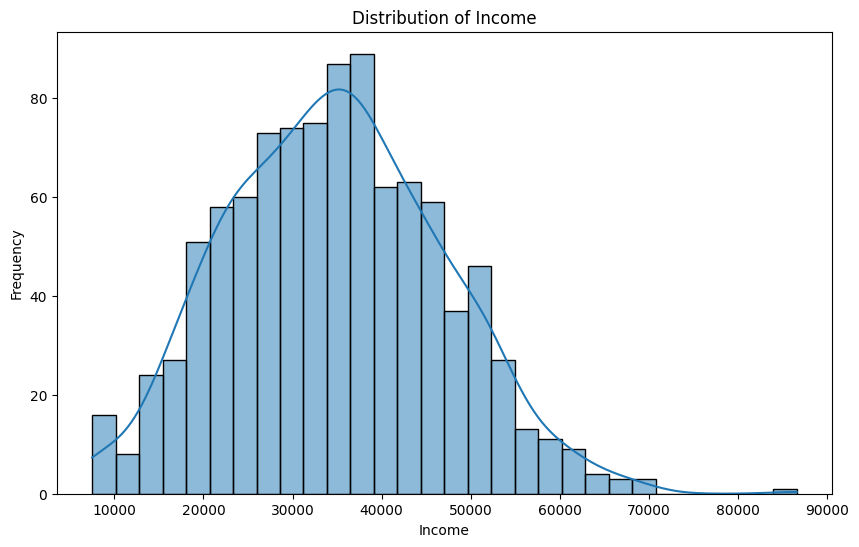

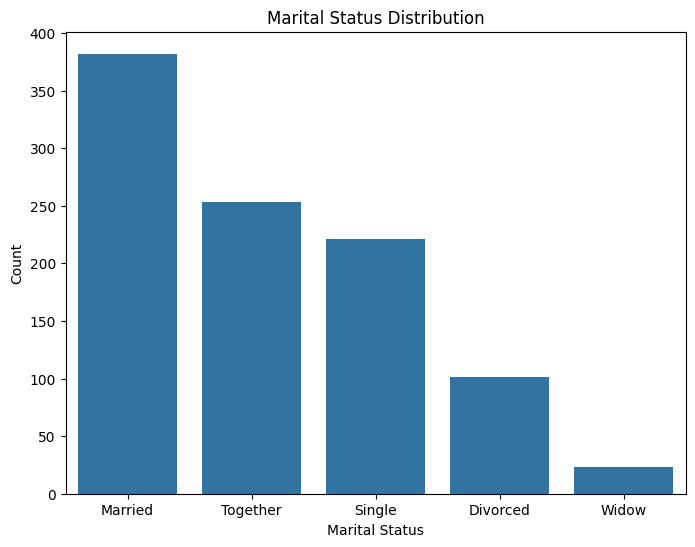

In [33]:
# Distribution of Income
plt.figure(figsize=(10, 6))
sns.histplot(df['Income'], bins=30, kde=True)
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

# Marital Status Distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Marital_Status', order=df['Marital_Status'].value_counts().index)
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

In [34]:
# Saving cleaned dataset
df.to_csv('cleaned_marketing_campaign.csv', index=False)
print("\nCleaned dataset saved as 'cleaned_marketing_campaign.csv'.")


Cleaned dataset saved as 'cleaned_marketing_campaign.csv'.


## Conclusion
In this notebook, we cleaned the `marketing_campaign.csv` dataset by:
- Handling missing values.
- Removing outliers and invalid entries.
- Validating categorical and numerical columns.
- Ensuring date consistency.
- Saving the cleaned dataset for further analysis.

The cleaned dataset is ready for exploratory data analysis (EDA) and modeling.

In [36]:
df.to_csv('cleaned_marketing_campaign.csv', index=False)
files.download('cleaned_marketing_campaign.csv')
print("Saved the dataset to local folder")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saved the dataset to local folder
